In [43]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures

# 매개변수 그리드
from sklearn.model_selection import GridSearchCV


# 성능 평가
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

f1_scorer = make_scorer(f1_score, pos_label="Y")


#파이프라인
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

# model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# 딥러닝
import tensorflow

from keras.layers import Dense
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1zdaujvrEHpei8_MIr5RRq-uA6LsCVCzZ/view?usp=sharing' # The shareable link
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
id = '1zdaujvrEHpei8_MIr5RRq-uA6LsCVCzZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('results.csv') 


In [4]:
datas = pd.read_csv('results.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
datas.shape

(1079619, 21)

In [ ]:
datas.isnull().sum()

name        1057436
neo               2
pha           10615
H              3986
diameter     939620
albedo       940771
rot_per     1047042
spec_B      1077953
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                2
n                 0
tp                0
per               2
moid          10615
class             0
dtype: int64

In [5]:
X = datas.drop(['name', 'spec_B', 'rot_per'], axis=1)
X = X.dropna(subset=['diameter', 'moid', 'H', 'ma', 'albedo', 'pha', 'ad', 'neo'])
y = X['diameter']

X = X.drop(['diameter'], axis=1)

print(X.shape)
print(y.shape)

(136393, 17)
(136393,)


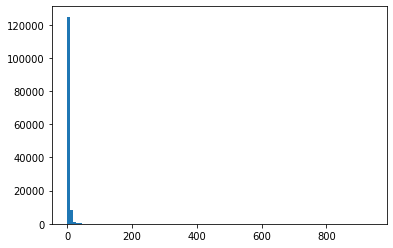

In [ ]:
plt.hist( y, bins=100)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f5cd7a26090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cd7e3dd90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cd7bbb710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cd7e61350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cd7a713d0>,
  <matplotlib.lines.Line2D at 0x7f5cd7a26350>]}

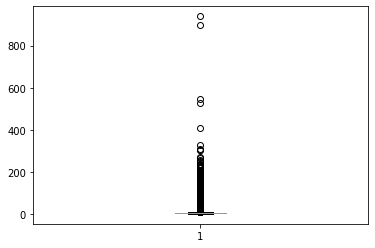

In [ ]:
plt.boxplot(y)

In [120]:
def remove_mask(data):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  print(q1)
  print(q3)
  iqr = q3-q1
  iqr = iqr * 1.5

  lowest = q1 - iqr
  hightest = q3 + iqr
  print(hightest)
  mask_index = data[(data > lowest) | (data < hightest)]
  print(mask_index)
  return mask_index

In [123]:
mask = remove_mask(np.array(y))
mask.shape

2.8110000000000004
5.79
10.2585
[939.4   545.    246.596 ...   2.182   2.887   2.226]


(136393,)

In [6]:
X = pd.get_dummies(X)
X_res = X[:50000]
y_res = y[:50000]
# 데이터는 50000개로 제한

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0)
# 훈련 / 테스트 데이터로 분할

print(X_train.shape)
print(X_test.shape)

(37500, 29)
(12500, 29)


In [7]:
# 스케일링

stdscaler = StandardScaler()

X_train_sscaled = stdscaler.fit_transform(X_train)
X_test_sscaled = stdscaler.transform(X_test)

mmscaler = MinMaxScaler()
X_train_mscaled = mmscaler.fit_transform(X_train)
X_test_mscaled = mmscaler.transform(X_test)

In [10]:
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(mean_squared_error(y_test, rf.predict(X_test)))
print(mean_absolute_error(y_test, rf.predict(X_test)))

0.9539735240169872
9.352734611171474
0.6270222336000001


In [11]:
# 중요도 함수
def plot_feature_importances(model, X, fea):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fea)
    plt.xlabel("importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.xlim(0,1)
    plt.grid()

Index(['H', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'per', 'moid', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y', 'class_AMO',
       'class_APO', 'class_AST', 'class_ATE', 'class_CEN', 'class_IMB',
       'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object')


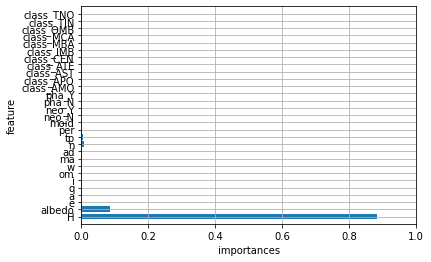

In [12]:
features = X_train.columns
print(features)

plot_feature_importances(rf, X_train, features)

Text(0.5, 0, 'albedo')

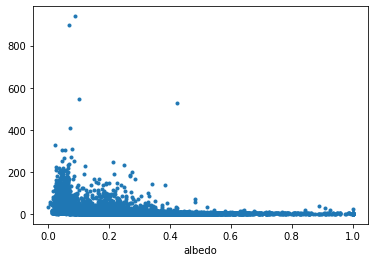

In [14]:
plt.plot(X_res.albedo, y_res, '.')
plt.xlabel('albedo')

Text(0.5, 0, 'H')

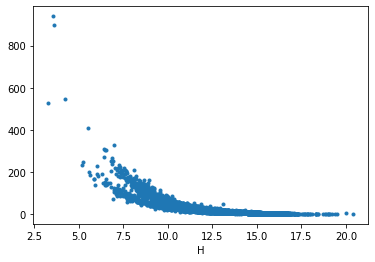

In [15]:
plt.plot(X_res.H, y_res, '.')
plt.xlabel('H')

In [24]:
param_grid = { 
              'max_depth' : [1,2,3,5,7,9,11,13,15]
             }

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

print("테스트 세트 점수 : ", grid_search_rf.score(X_test, y_test))
print("최적 매개변수 ", grid_search_rf.best_params_)
print("최적 교차 검증 점수 ", grid_search_rf.best_score_)
print("최적 성능 모델 ", grid_search_rf.best_estimator_)


테스트 세트 점수 :  0.954077754458425
최적 매개변수  {'max_depth': 11}
최적 교차 검증 점수  0.9438651587060936
최적 성능 모델  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [25]:
rf_grid = RandomForestRegressor(max_depth=11, random_state=0).fit(X_train, y_train)

print(rf_grid.score(X_test, y_test))
print(mean_squared_error(y_test, rf_grid.predict(X_test)))
print(mean_absolute_error(y_test, rf_grid.predict(X_test)))

0.954077754458425
9.331554635160865
0.6252035440559272


In [26]:
rf_grid = RandomForestRegressor(max_depth=13, random_state=0).fit(X_train, y_train)

print(rf_grid.score(X_test, y_test))
print(mean_squared_error(y_test, rf_grid.predict(X_test)))
print(mean_absolute_error(y_test, rf_grid.predict(X_test)))

0.9540768085175082
9.331746853534412
0.6237439947556174


In [ ]:
rf_grid = RandomForestRegressor(max_depth=13).fit(X_train, y_train)

print(rf_grid.score(X_test, y_test))
print(mean_squared_error(y_test, rf_grid.predict(X_test)))
print(mean_absolute_error(y_test, rf_grid.predict(X_test)))

In [23]:
xg = XGBRegressor(random_state=0).fit(X_train, y_train)
print(xg.score(X_test, y_test))
print(mean_squared_error(y_test, xg.predict(X_test)))
print(mean_absolute_error(y_test, xg.predict(X_test)))

[08:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9213034194695613
15.991409656901105
0.7276772583573533


In [27]:
param_grid = { 
              'max_depth' : [1,2,3,5,7,9,11,13],
             }

grid_search_xg = GridSearchCV(XGBRegressor(random_state=0), param_grid, cv=5)
grid_search_xg.fit(X_train, y_train)

print("테스트 세트 점수 : ", grid_search_xg.score(X_test, y_test))
print("최적 매개변수 ", grid_search_xg.best_params_)
print("최적 교차 검증 점수 ", grid_search_xg.best_score_)
print("최적 성능 모델 ", grid_search_xg.best_estimator_)


[08:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [21]:
xg_grid = XGBRegressor(max_depth=7, learning_rate=0.1, random_state=0).fit(X_train, y_train)

print(xg_grid.score(X_test, y_test)) 
print(mean_squared_error(y_test, xg_grid.predict(X_test)))
print(mean_absolute_error(y_test, xg_grid.predict(X_test)))

[08:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8995006668109763
20.421802274489714
0.6407373584480286


In [19]:
svr = SVR().fit(X_train_sscaled, y_train)
print(svr.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, svr.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, svr.predict(X_test_sscaled)))

0.6079715076181682
79.6615072294077
1.2851494069299174


In [20]:
svr = SVR().fit(X_train_mscaled, y_train)
print(svr.score(X_test_mscaled, y_test))
print(mean_squared_error(y_test, svr.predict(X_test_mscaled)))
print(mean_absolute_error(y_test, svr.predict(X_test_mscaled)))


0.3532971288355967
131.41219693890122
2.1619269559406438


In [13]:
pipe = make_pipeline(
    StandardScaler(),
    SVR()
)

param_grid_svr = {
    'svr__C' : [0.01, 0.1, 1, 10]
}

grid_svr = GridSearchCV(pipe, param_grid_svr, cv=5)
grid_svr.fit(X_train, y_train)

print("테스트 세트 점수 : ", grid_svr.score(X_test, y_test))
print("최적 매개변수 ", grid_svr.best_params_)
print("최적 교차 검증 점수 ", grid_svr.best_score_)
print("최적 성능 모델 ", grid_svr.best_estimator_)


테스트 세트 점수 :  0.7769356947417684
최적 매개변수  {'svr__C': 10}
최적 교차 검증 점수  0.7659451391130441
최적 성능 모델  Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [14]:
svr_grid = SVR(C=10).fit(X_train_sscaled, y_train)

print(svr_grid.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, svr_grid.predict(X_test_sscaled)))

0.7769356947417684
45.32741653033721


In [15]:
mlp = MLPRegressor(random_state=0).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_sscaled)))

0.9397729587288763
12.238337204716373
0.8471237988521523


In [16]:
mlp = MLPRegressor(random_state=0).fit(X_train_mscaled, y_train)
print(mlp.score(X_test_mscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_mscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_mscaled)))

0.9362201832258275
12.96027312753944
0.8367553632013109


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(10,10)).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_sscaled)))

0.9546039073150856
9.224638606328412
0.8488582661380603


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(100,10,10)).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_sscaled)))

0.9271640118474027
14.800517588726333
1.0073818525863938


In [19]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(100,10,10,10)).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_sscaled)))

0.9459347330408824
10.986243955270243
0.7659587908855688


In [20]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(100,100,10,10,10)).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))
print(mean_absolute_error(y_test, mlp.predict(X_test_sscaled)))

0.9218285087445823
15.88470975143244
0.7514697514842957


In [28]:
# 학습 / 검증 데이터로 분할 후 스케일링

X_traind, X_testd, y_traind, y_testd = train_test_split(X_res, y_res, random_state=0)

X_traind, X_valid, y_traind, y_valid = train_test_split(X_traind, y_traind, random_state=0)
std = StandardScaler()
X_train_scaled = std.fit_transform(X_traind)
X_valid_scaled = std.transform(X_valid)
X_test_scaled = std.transform(X_testd)

In [29]:
print(X_train_scaled.shape)
print(X_valid_scaled.shape)
print(X_test_scaled.shape)

(28125, 29)
(9375, 29)
(12500, 29)


In [59]:
seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)

In [75]:
# 자동 종료를 위해 추가

early_stopping = EarlyStopping(monitor='val_mse', patience=100)

model = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

history = model.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 6ms/step - loss: 266.2503 - mae: 7.7160 - mse: 266.2503 - val_loss: 202.1752 - val_mae: 6.4510 - val_mse: 202.1752
Epoch 2/3000
57/57 [==============================] - 0s 2ms/step - loss: 282.5701 - mae: 6.1036 - mse: 282.5701 - val_loss: 162.1038 - val_mae: 4.7303 - val_mse: 162.1038
Epoch 3/3000
57/57 [==============================] - 0s 2ms/step - loss: 240.6987 - mae: 4.5642 - mse: 240.6987 - val_loss: 131.0324 - val_mae: 3.4470 - val_mse: 131.0324
Epoch 4/3000
57/57 [==============================] - 0s 3ms/step - loss: 144.2010 - mae: 3.4667 - mse: 144.2010 - val_loss: 111.6342 - val_mae: 3.0641 - val_mse: 111.6342
Epoch 5/3000
57/57 [==============================] - 0s 3ms/step - loss: 187.4604 - mae: 3.2735 - mse: 187.4604 - val_loss: 98.8579 - val_mae: 3.0181 - val_mse: 98.8579
Epoch 6/3000
57/57 [==============================] - 0s 2ms/step - loss: 149.3776 - mae: 3.1336 - mse: 149.3776 - val_loss: 89.3344 - val_mae

In [76]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model.evaluate(X_test_scaled, y_testd)[1])

391/391 [==============================] - 0s 1ms/step - loss: 13.6317 - mae: 0.9931 - mse: 13.6317
Accuracy :  0.9931209087371826


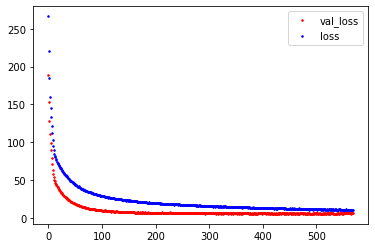

In [62]:
y_vloss = history.history['val_loss'] # 테스트 세트 손실
y_loss = history.history['loss'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, '.', c='red', markersize=3, label="val_loss")
plt.plot(x_len, y_loss, '.', c='blue',  markersize=3,label = 'loss')
plt.legend()
plt.show()


In [77]:
# 자동 종료를 위해 추가

early_stopping = EarlyStopping(monitor='val_loss', patience=50)

model1 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history1 = model1.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 7ms/step - loss: 257.5628 - mae: 7.4617 - val_loss: 170.3504 - val_mae: 4.7782
Epoch 2/3000
57/57 [==============================] - 0s 3ms/step - loss: 225.3252 - mae: 4.0681 - val_loss: 112.2076 - val_mae: 3.2883
Epoch 3/3000
57/57 [==============================] - 0s 2ms/step - loss: 172.7946 - mae: 3.6401 - val_loss: 87.8167 - val_mae: 2.9800
Epoch 4/3000
57/57 [==============================] - 0s 2ms/step - loss: 97.0599 - mae: 3.0256 - val_loss: 66.3840 - val_mae: 2.9117
Epoch 5/3000
57/57 [==============================] - 0s 2ms/step - loss: 122.1433 - mae: 2.9928 - val_loss: 52.6932 - val_mae: 2.6514
Epoch 6/3000
57/57 [==============================] - 0s 2ms/step - loss: 91.0324 - mae: 2.7728 - val_loss: 46.4910 - val_mae: 2.7774
Epoch 7/3000
57/57 [==============================] - 0s 3ms/step - loss: 54.3864 - mae: 2.8234 - val_loss: 43.1301 - val_mae: 2.6771
Epoch 8/3000
57/57 [==============================] - 0s

391/391 [==============================] - 0s 959us/step - loss: 14.0973 - mae: 0.8520
Accuracy :  0.85200434923172


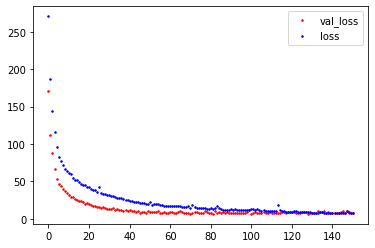

In [78]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model1.evaluate(X_test_scaled, y_testd)[1])


y_vloss = history1.history['val_loss'] # 테스트 세트 손실
y_loss = history1.history['loss'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, '.', c='red', markersize=3, label="val_loss")
plt.plot(x_len, y_loss, '.', c='blue',  markersize=3,label = 'loss')
plt.legend()
plt.show()


In [79]:

model2 = Sequential([
      Dense(128, activation='relu', input_dim=X_train.shape[1]),
      Dense(64, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model2.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
history2 = model2.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 9ms/step - loss: 239.3289 - mae: 6.6292 - mse: 239.3289 - val_loss: 129.7288 - val_mae: 3.5658 - val_mse: 129.7288
Epoch 2/3000
57/57 [==============================] - 0s 5ms/step - loss: 175.7392 - mae: 3.6776 - mse: 175.7392 - val_loss: 81.6080 - val_mae: 2.8866 - val_mse: 81.6080
Epoch 3/3000
57/57 [==============================] - 0s 4ms/step - loss: 128.0916 - mae: 3.0917 - mse: 128.0916 - val_loss: 52.2824 - val_mae: 2.7776 - val_mse: 52.2824
Epoch 4/3000
57/57 [==============================] - 0s 4ms/step - loss: 58.8882 - mae: 2.8503 - mse: 58.8882 - val_loss: 41.8523 - val_mae: 2.8959 - val_mse: 41.8523
Epoch 5/3000
57/57 [==============================] - 0s 4ms/step - loss: 86.4688 - mae: 3.0440 - mse: 86.4688 - val_loss: 37.2346 - val_mae: 2.5248 - val_mse: 37.2346
Epoch 6/3000
57/57 [==============================] - 0s 4ms/step - loss: 70.8450 - mae: 2.4926 - mse: 70.8450 - val_loss: 31.4617 - val_mae: 2.3240 - v

391/391 [==============================] - 0s 1ms/step - loss: 18.9102 - mae: 1.1084 - mse: 18.9102
Accuracy :  1.1084024906158447


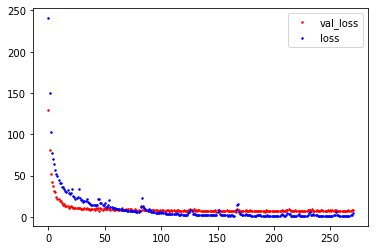

In [80]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model2.evaluate(X_test_scaled, y_test)[1])

y_vloss = history2.history['val_loss'] # 테스트 세트 손실
y_loss = history2.history['loss'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, '.', c='red', markersize=3, label="val_loss")
plt.plot(x_len, y_loss, '.', c='blue',  markersize=3,label = 'loss')
plt.legend()
plt.show()

In [81]:
# 자동 종료를 위해 추가

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model4 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

history4 = model4.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 9ms/step - loss: 255.6876 - mae: 7.1183 - val_loss: 147.6676 - val_mae: 4.0916
Epoch 2/3000
57/57 [==============================] - 0s 3ms/step - loss: 197.2062 - mae: 4.2776 - val_loss: 96.7441 - val_mae: 3.0850
Epoch 3/3000
57/57 [==============================] - 0s 3ms/step - loss: 144.7659 - mae: 3.3301 - val_loss: 53.3903 - val_mae: 2.7151
Epoch 4/3000
57/57 [==============================] - 0s 3ms/step - loss: 61.1559 - mae: 2.7262 - val_loss: 36.0294 - val_mae: 2.5542
Epoch 5/3000
57/57 [==============================] - 0s 3ms/step - loss: 82.0393 - mae: 2.6606 - val_loss: 30.5870 - val_mae: 1.9752
Epoch 6/3000
57/57 [==============================] - 0s 4ms/step - loss: 63.5874 - mae: 2.0208 - val_loss: 23.9278 - val_mae: 1.8336
Epoch 7/3000
57/57 [==============================] - 0s 4ms/step - loss: 29.0822 - mae: 1.7484 - val_loss: 21.0933 - val_mae: 1.5571
Epoch 8/3000
57/57 [==============================] - 0s 3

391/391 [==============================] - 0s 1ms/step - loss: 8.3478 - mae: 0.6850
Accuracy :  0.6849756836891174


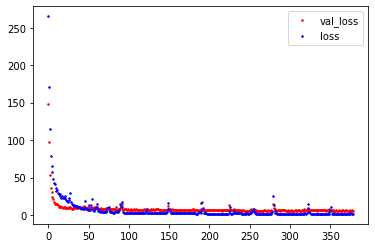

In [82]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model4.evaluate(X_test_scaled, y_testd)[1])

y_vloss = history4.history['val_loss'] # 테스트 세트 손실
y_loss = history4.history['loss'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, '.', c='red', markersize=3, label="val_loss")
plt.plot(x_len, y_loss, '.', c='blue',  markersize=3,label = 'loss')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint


modelpath = './model/{epoch:02d}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)


early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model4 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

history4 = model4.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping, checkpointer])

Epoch 1/3000
57/57 [==============================] - 1s 8ms/step - loss: 251.8914 - mae: 7.1623 - val_loss: 138.4092 - val_mae: 3.6894

Epoch 00001: val_loss improved from inf to 138.40918, saving model to ./model/01.hdf5
Epoch 2/3000
57/57 [==============================] - 0s 3ms/step - loss: 193.6483 - mae: 3.9010 - val_loss: 87.6876 - val_mae: 3.1564

Epoch 00002: val_loss improved from 138.40918 to 87.68758, saving model to ./model/02.hdf5
Epoch 3/3000
57/57 [==============================] - 0s 3ms/step - loss: 138.4404 - mae: 3.3600 - val_loss: 51.4564 - val_mae: 2.6342

Epoch 00003: val_loss improved from 87.68758 to 51.45639, saving model to ./model/03.hdf5
Epoch 4/3000
57/57 [==============================] - 0s 4ms/step - loss: 58.7409 - mae: 2.6328 - val_loss: 35.9200 - val_mae: 2.3693

Epoch 00004: val_loss improved from 51.45639 to 35.91999, saving model to ./model/04.hdf5
Epoch 5/3000
57/57 [==============================] - 0s 3ms/step - loss: 81.1409 - mae: 2.3957 - v

In [ ]:
mymodel

In [ ]:
from keras.models import load_model

mymodel = load_model('./model/168.hdf5')

391/391 [==============================] - 0s 991us/step - loss: 9.7253 - mae: 0.6764
Accuracy :  0.6763774752616882


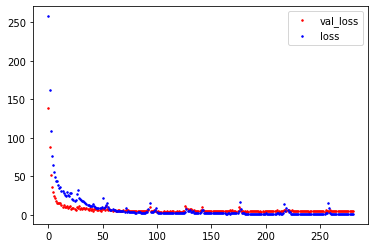

In [126]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model4.evaluate(X_test_scaled, y_testd)[1])

y_vloss = history4.history['val_loss'] # 테스트 세트 손실
y_loss = history4.history['loss'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, '.', c='red', markersize=3, label="val_loss")
plt.plot(x_len, y_loss, '.', c='blue',  markersize=3,label = 'loss')
plt.legend()
plt.show()

In [84]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model5 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(8, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model5.compile(optimizer='adam', loss='mse', metrics=['mae'])

history5 = model5.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 8ms/step - loss: 253.5326 - mae: 7.3046 - val_loss: 129.6341 - val_mae: 3.5259
Epoch 2/3000
57/57 [==============================] - 0s 3ms/step - loss: 171.0369 - mae: 3.7302 - val_loss: 77.6340 - val_mae: 2.7569
Epoch 3/3000
57/57 [==============================] - 0s 4ms/step - loss: 126.5786 - mae: 3.1861 - val_loss: 50.9051 - val_mae: 2.7856
Epoch 4/3000
57/57 [==============================] - 0s 3ms/step - loss: 59.7726 - mae: 2.8197 - val_loss: 39.6354 - val_mae: 2.6568
Epoch 5/3000
57/57 [==============================] - 0s 3ms/step - loss: 88.9549 - mae: 2.8106 - val_loss: 34.4176 - val_mae: 2.3233
Epoch 6/3000
57/57 [==============================] - 0s 3ms/step - loss: 68.7451 - mae: 2.2732 - val_loss: 28.7348 - val_mae: 1.9268
Epoch 7/3000
57/57 [==============================] - 0s 3ms/step - loss: 35.1613 - mae: 1.8628 - val_loss: 24.7874 - val_mae: 1.7077
Epoch 8/3000
57/57 [==============================] - 0s 4

In [85]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model5.evaluate(X_test_scaled, y_testd)[1])

391/391 [==============================] - 0s 985us/step - loss: 14.0024 - mae: 0.6833
Accuracy :  0.6833480596542358


In [86]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model6 = Sequential([
      Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(16, activation='relu'),
      Dense(1)
])


optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

history6 = model6.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])

Epoch 1/3000
57/57 [==============================] - 1s 7ms/step - loss: 274.1829 - mae: 8.0148 - val_loss: 211.4858 - val_mae: 6.7229
Epoch 2/3000
57/57 [==============================] - 0s 2ms/step - loss: 289.2833 - mae: 6.2268 - val_loss: 158.7015 - val_mae: 4.3962
Epoch 3/3000
57/57 [==============================] - 0s 2ms/step - loss: 228.8797 - mae: 4.3065 - val_loss: 123.8680 - val_mae: 3.4335
Epoch 4/3000
57/57 [==============================] - 0s 2ms/step - loss: 133.6031 - mae: 3.5444 - val_loss: 102.0885 - val_mae: 3.4845
Epoch 5/3000
57/57 [==============================] - 0s 2ms/step - loss: 168.7346 - mae: 3.6394 - val_loss: 84.0419 - val_mae: 2.9653
Epoch 6/3000
57/57 [==============================] - 0s 2ms/step - loss: 127.1057 - mae: 3.0307 - val_loss: 68.7240 - val_mae: 2.6968
Epoch 7/3000
57/57 [==============================] - 0s 2ms/step - loss: 78.7803 - mae: 2.7407 - val_loss: 58.2687 - val_mae: 2.4800
Epoch 8/3000
57/57 [==============================] 

In [87]:
# 테스트 세트에 대한 성능 평가
print("Accuracy : ", model6.evaluate(X_test_scaled, y_testd)[1])

391/391 [==============================] - 0s 972us/step - loss: 11.7356 - mae: 0.9017
Accuracy :  0.9017428159713745


# 성능평가 최종

In [ ]:
rf = RandomForestRegressor(max_depth=11, random_state=0)

mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(10,10))


# 자동 종료를 위해 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model4 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
])

optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

history4 = model4.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping])


model5 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(8, activation='relu'),
      Dense(1)
])


In [127]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=0)
X_res = np.array(X_res)
y_res = np.array(y_res)


rf = RandomForestRegressor(max_depth=11, random_state=0)

for train,test in kf.split(X_res,y_res):
  rf = RandomForestRegressor(max_depth=11, random_state=0)
  rf.fit(X_res[train], y_res[train])
  print(rf.score(X_res[test], y_res[test]))
  print(mean_squared_error(y_res[test], rf.predict(X_res[test])))
  print(mean_absolute_error(y_res[test], rf.predict(X_res[test])))

  print('\n')

0.9818978586816753
3.0669812563896244
0.581497211332357


0.9468431114684789
15.072933444538153
0.6650790841608569


0.9826199873919741
2.551726166394124
0.5916477956099763


0.9640301437519567
6.775687689722222
0.6529677530105051


0.9830549971441325
2.50653043977803
0.5924612650707548


0.8981986840669036
39.79997124537171
0.7138426173427876


0.9864065838344989
2.687177130685316
0.6150639759760421


0.977900459811904
3.4441327577931173
0.6176411996028255


0.9709845947361029
9.139235681583422
0.6302676967678215


0.9759130410712755
4.932558937521613
0.6621796109764766




In [129]:
std = StandardScaler()

for train,test in kf.split(X_res,y_res):
  X_train_scaled = std.fit_transform(X_res[train])
  X_test_scaled = std.transform(X_res[test])
  mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(10,10), max_iter=1000)
  mlp.fit(X_train_scaled, y_res[train])
  print(mlp.score(X_test_scaled, y_res[test]))
  print(mean_squared_error(y_res[test], mlp.predict(X_test_scaled)))
  print(mean_absolute_error(y_res[test], mlp.predict(X_test_scaled)))

  print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9525109265909998
8.045904374930254
0.8428739454785087




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9356000836382351
18.260956951592444
0.9101387149459275




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9800446725333054
2.9298328145178334
0.7939157534919336




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9771311198128364
4.3078401229453265
0.7498555771445173




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9756962170571164
3.5950523152023086
0.811100615155521


0.802062499099197
77.38511798226695
1.115095523638183




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9406582650072468
11.730807857734424
0.8515181335339778




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9739696399948331
4.056736693518806
0.7543372870241808




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8691607598021904
41.21157852842186
0.9074545051125499


0.8651141542572047
27.62209982308539
0.9590527977330032




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [131]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model4 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
])

optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

for train,test in kf.split(X_res,y_res):

  X_traind, X_valid, y_traind, y_valid = train_test_split(X_res[train], y_res[train], random_state=0)
  std = StandardScaler()
  X_train_scaled = std.fit_transform(X_traind)
  X_valid_scaled = std.transform(X_valid)
  X_test_scaled = std.transform(X_res[test])

  history4 = model4.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping], verbose=0)
  print("Loss : ", model4.evaluate(X_test_scaled, y_res[test])[1])

  print('\n')

157/157 [==============================] - 0s 987us/step - loss: 2.2673 - mae: 0.6126
Loss :  0.6126148700714111


157/157 [==============================] - 0s 1ms/step - loss: 17.0380 - mae: 0.7185
Loss :  0.7185357213020325


157/157 [==============================] - 0s 1ms/step - loss: 2.0912 - mae: 0.6181
Loss :  0.6181231141090393


157/157 [==============================] - 0s 1ms/step - loss: 2.9793 - mae: 0.6401
Loss :  0.6401382088661194


157/157 [==============================] - 0s 1ms/step - loss: 2.3629 - mae: 0.6173
Loss :  0.6173050999641418


157/157 [==============================] - 0s 1ms/step - loss: 2.3770 - mae: 0.6245
Loss :  0.6245232224464417


157/157 [==============================] - 0s 1ms/step - loss: 2.6128 - mae: 0.6243
Loss :  0.6242926120758057


157/157 [==============================] - 0s 1ms/step - loss: 2.4278 - mae: 0.6277
Loss :  0.6277058720588684


157/157 [==============================] - 0s 1ms/step - loss: 4.9252 - mae: 0.6377
Loss :  0

In [132]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model5 = Sequential([
      Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(8, activation='relu'),
      Dense(1)
])

optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model5.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

for train,test in kf.split(X_res,y_res):

  X_traind, X_valid, y_traind, y_valid = train_test_split(X_res[train], y_res[train], random_state=0)
  std = StandardScaler()
  X_train_scaled = std.fit_transform(X_traind)
  X_valid_scaled = std.transform(X_valid)
  X_test_scaled = std.transform(X_res[test])

  history5 = model5.fit(X_train_scaled, y_traind, validation_data=(X_valid_scaled, y_valid), epochs=3000, batch_size=500,
                    callbacks=[early_stopping], verbose=0)
  print("Loss : ", model5.evaluate(X_test_scaled, y_res[test])[1])

  print('\n')

157/157 [==============================] - 0s 1ms/step - loss: 3.5979 - mae: 0.6835
Loss :  0.6834807991981506


157/157 [==============================] - 0s 1ms/step - loss: 11.8944 - mae: 0.7650
Loss :  0.7649785876274109


157/157 [==============================] - 0s 1ms/step - loss: 3.3977 - mae: 0.6931
Loss :  0.6931307315826416


157/157 [==============================] - 0s 1ms/step - loss: 2.1963 - mae: 0.6199
Loss :  0.6198510527610779


157/157 [==============================] - 0s 1ms/step - loss: 1.5707 - mae: 0.5856
Loss :  0.585618793964386


157/157 [==============================] - 0s 966us/step - loss: 1.9677 - mae: 0.6092
Loss :  0.6092431545257568


157/157 [==============================] - 0s 1ms/step - loss: 3.3151 - mae: 0.6561
Loss :  0.656103253364563


157/157 [==============================] - 0s 1ms/step - loss: 1.6748 - mae: 0.6083
Loss :  0.608311653137207


157/157 [==============================] - 0s 1ms/step - loss: 10.4970 - mae: 0.6604
Loss :  0.6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0)

std = StandardScaler()


In [135]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(max_depth=11, random_state=0)
cv = cross_val_score(rf, X_res, y_res, cv=10 ,scoring='neg_mean_squared_error')

In [138]:
print(-cv)

[2.83323991e+02 1.15531056e+00 2.32836534e+00 1.02071158e+01
 4.06528344e-01 3.57428686e-01 3.65065445e-01 4.34760745e-01
 4.51534855e-01 2.77587411e-01]
